In [53]:
#Examining Factors responsible for heart attacks

In [54]:
#Importing the necessary libraries

In [55]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, style
import seaborn as sns
style.use('ggplot')

In [56]:
#Importing the data

In [57]:
df=pd.read_excel('heart_data.xlsx')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [58]:
#Preliminary Data Inspection

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [60]:
df.shape

(303, 14)

In [61]:
#Preliminary statistical summary of the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.describe(inc)

In [62]:
#Checking for null values in the dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [63]:
#There is no null value in the given dataset

In [64]:
#Checking for duplicates in the dataset

In [65]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [66]:
#There is one duplicate value in the dataset
df[df.age==38]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0


In [67]:
#Removing duplicates
df=df[~df.duplicated()] 

In [68]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [69]:
labels=[['Female','Male'],['False','True'],['No','Yes'],['Healthy','Diseased']]
labels[2]

['No', 'Yes']

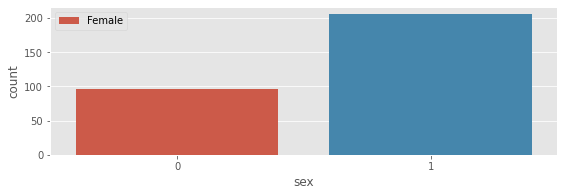

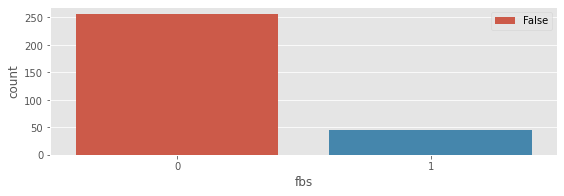

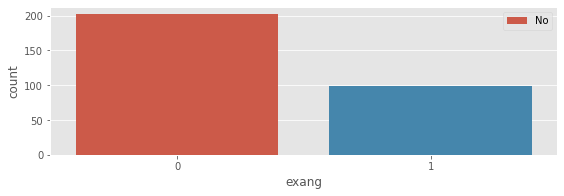

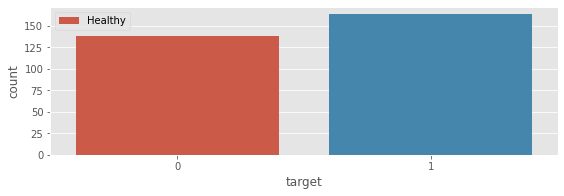

In [117]:
#Exploratory data analysis 
#Count plot of the categorical variables 
col=['sex','fbs','exang','target']
labels=[['Female','Male'],['False','True'],['No','Yes'],['Healthy','Diseased']]
for i in range(len(col)):
    plt.figure(figsize=(20,6))
    plt.subplot(2,2,i+1)
    sns.countplot(df[col[i]])
    plt.legend(labels[i])

In [71]:
#Bivariate Analysis - Age vs Target - Occurrence of CardioVascular Disease(CVD) across different ages

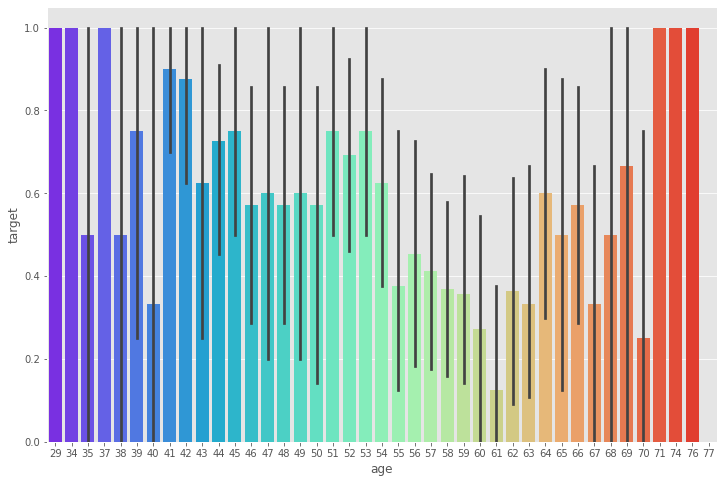

In [72]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='age', y='target',palette='rainbow')
plt.show()

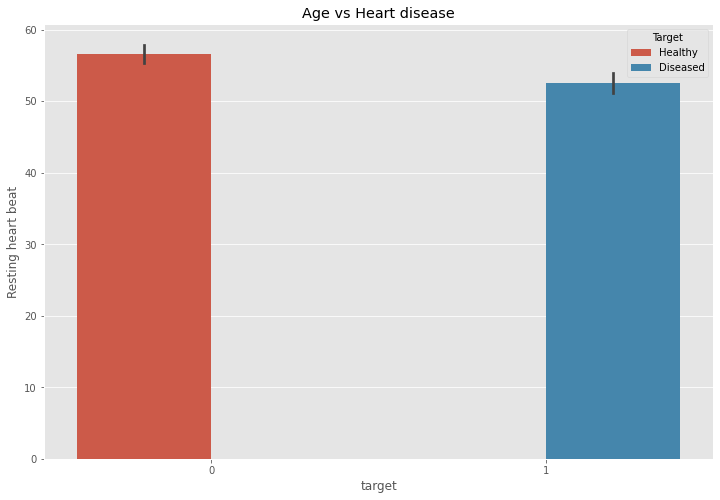

In [108]:
plt.figure(figsize=(12,8))
labels=['Healthy','Diseased']
ax=sns.barplot(data=df, y='age', x='target',hue='target')
ax.set_ylabel("Resting heart beat")
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title='Target')
plt.title('Age vs Heart disease')
plt.show()
#Age has some impact on heart disease.

In [74]:
df.target.unique()

array([1, 0])

In [75]:
df.trestbps.unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

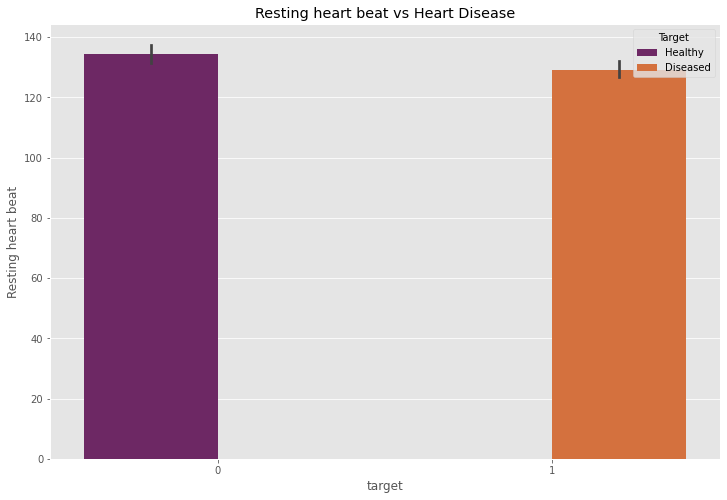

In [118]:
#"Resting heart beat vs Heart Disease"
plt.figure(figsize=(12,8))
labels=['Healthy','Diseased']
ax=sns.barplot(data=df, y='trestbps', x='target',palette='inferno', hue='target')
ax.set_ylabel("Resting heart beat")
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Target")
plt.title('Resting heart beat vs Heart Disease')
plt.show()
#Resting heart beat doesn't have a big impact in predicting heart diseases

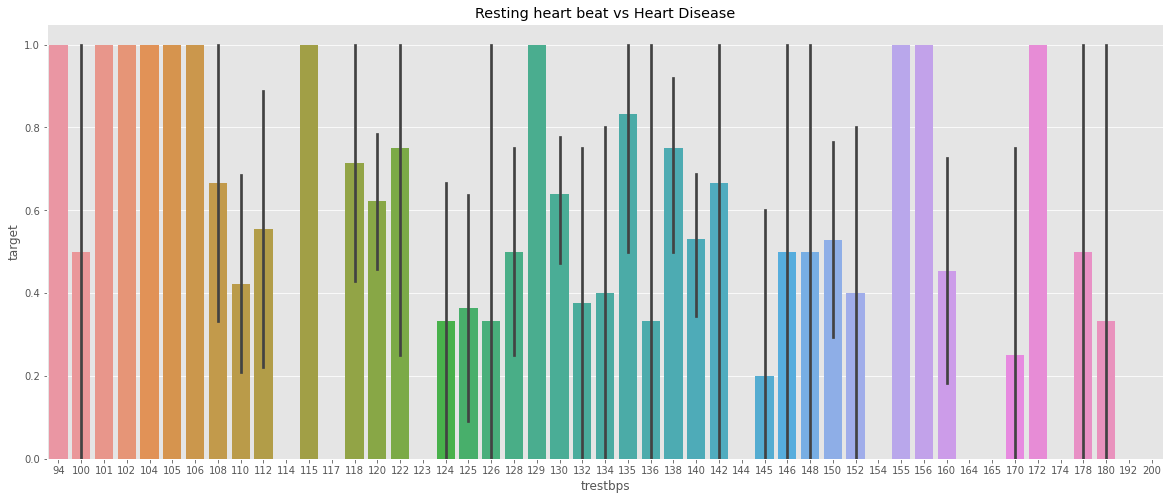

In [77]:
plt.figure(figsize=(20,8))
sns.barplot(data=df, x='trestbps', y='target')
plt.title("Resting heart beat vs Heart Disease")
plt.show()

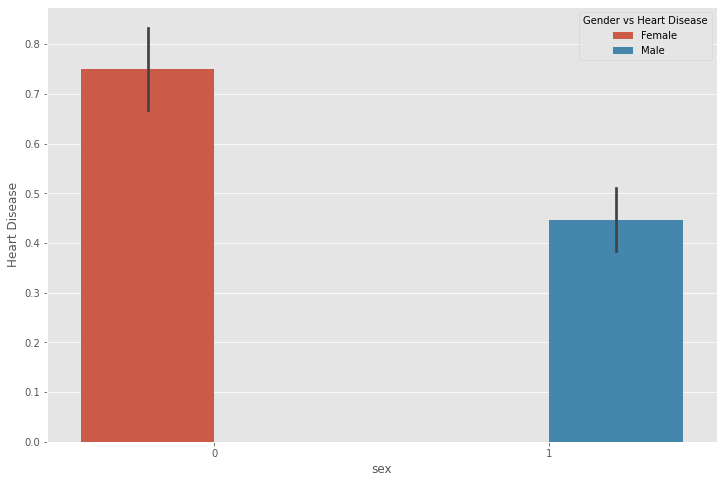

In [78]:
plt.figure(figsize=(12,8))
labels=['Female','Male']
ax=sns.barplot(data=df, x='sex', y='target',hue='sex')
ax.set_ylabel("Heart Disease")
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Gender vs Heart Disease")
plt.show()
#Gender has more impact in predicting heart disease and we can see that females are more likely to get heart disease than males

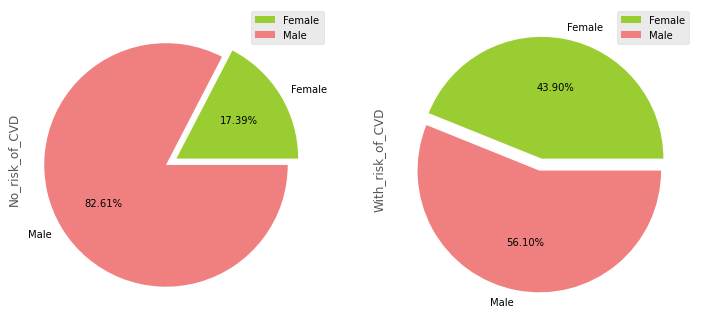

In [79]:
#Composition of overall patients with respect to gender
pie_df=pd.crosstab(df['sex'],df.target)
pie_df.columns=['No_risk_of_CVD','With_risk_of_CVD']
labels=['Female','Male']
pie_df.plot.pie(subplots=True,autopct='%.2f%%',explode=(0,0.1),labels=labels,figsize=(12,8),colors=['yellowgreen','lightcoral'])
plt.legend(['Female','Male'])
plt.show()

In [80]:
df.chol.unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131])

<Figure size 1440x432 with 0 Axes>

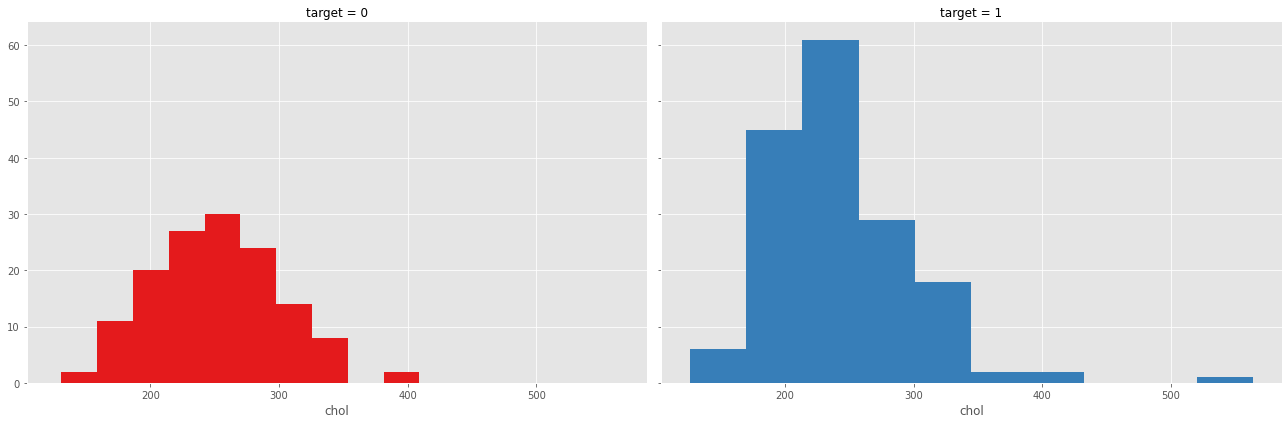

In [81]:
#Cholesterol levels vs  Possibility of CVD
plt.figure(figsize=(20,6))
p=sns.FacetGrid(df,col='target', hue='target',height=6,aspect=1.5, palette='Set1')
p.map(plt.hist,"chol", bins=10)
plt.show()
#People with more cholesteol levels are  more likely to get heart diseases

In [82]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [83]:
pd.crosstab(df['exang'],df.target)

target,0,1
exang,,
0,62,141
1,76,23


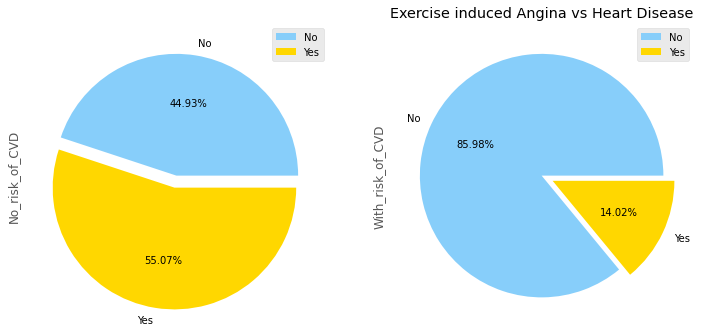

In [84]:
#Peak exercising and occurrence of heart attack
exang_df=pd.crosstab(df['exang'],df.target)
exang_df.columns=['No_risk_of_CVD','With_risk_of_CVD']
labels=['No','Yes']
exang_df.plot.pie(subplots=True,autopct='%.2f%%',labels=labels,explode=(0,0.1),figsize=(12,8), colors=['lightskyblue', 'gold'])
plt.legend(['No','Yes'])
plt.title('Exercise induced Angina vs Heart Disease')
plt.show()
#Exercise induced angina doesn't have a big impact on occurence of heart disease

In [85]:
df.thal.unique()

array([1, 2, 3, 0])

In [86]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


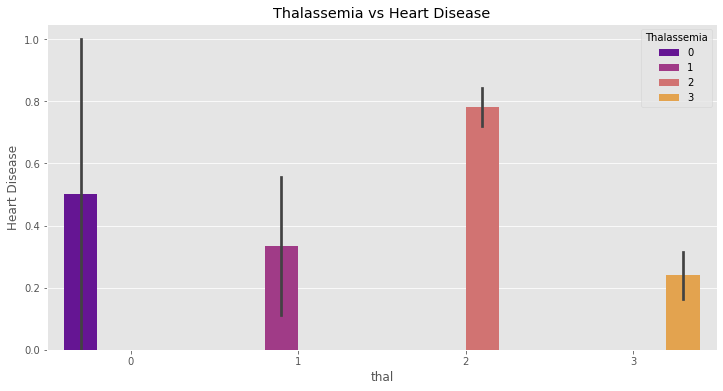

In [87]:
#Thalassemia vs CardioVasculardisease
plt.figure(figsize=(12,6))
labels=['0','1','2','3']
ax=sns.barplot(data=df,x='thal',y='target',palette='plasma', hue='thal')
ax.set_ylabel("Heart Disease")
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Thalassemia")
plt.title('Thalassemia vs Heart Disease')
plt.show()
#Thalassemia seems to have more impact on CVD as the level 2 thalassemia is likely to cause heart disease

In [88]:
df.thalach.unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90])

<Figure size 1440x432 with 0 Axes>

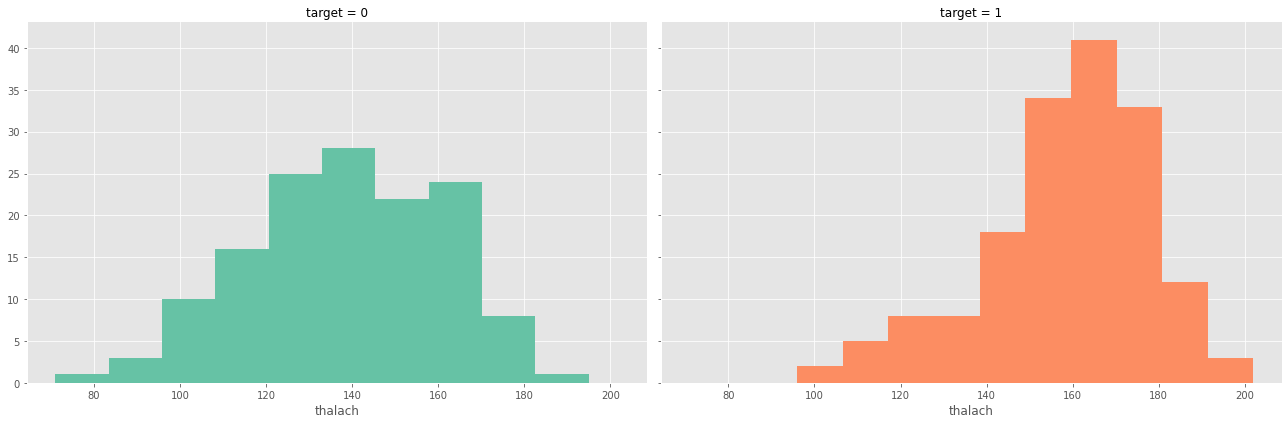

In [89]:
plt.figure(figsize=(20,6))
p=sns.FacetGrid(df,col='target',hue='target',height=6,aspect=1.5,palette='Set2')
p.map(plt.hist,"thalach", bins=10)

plt.show()

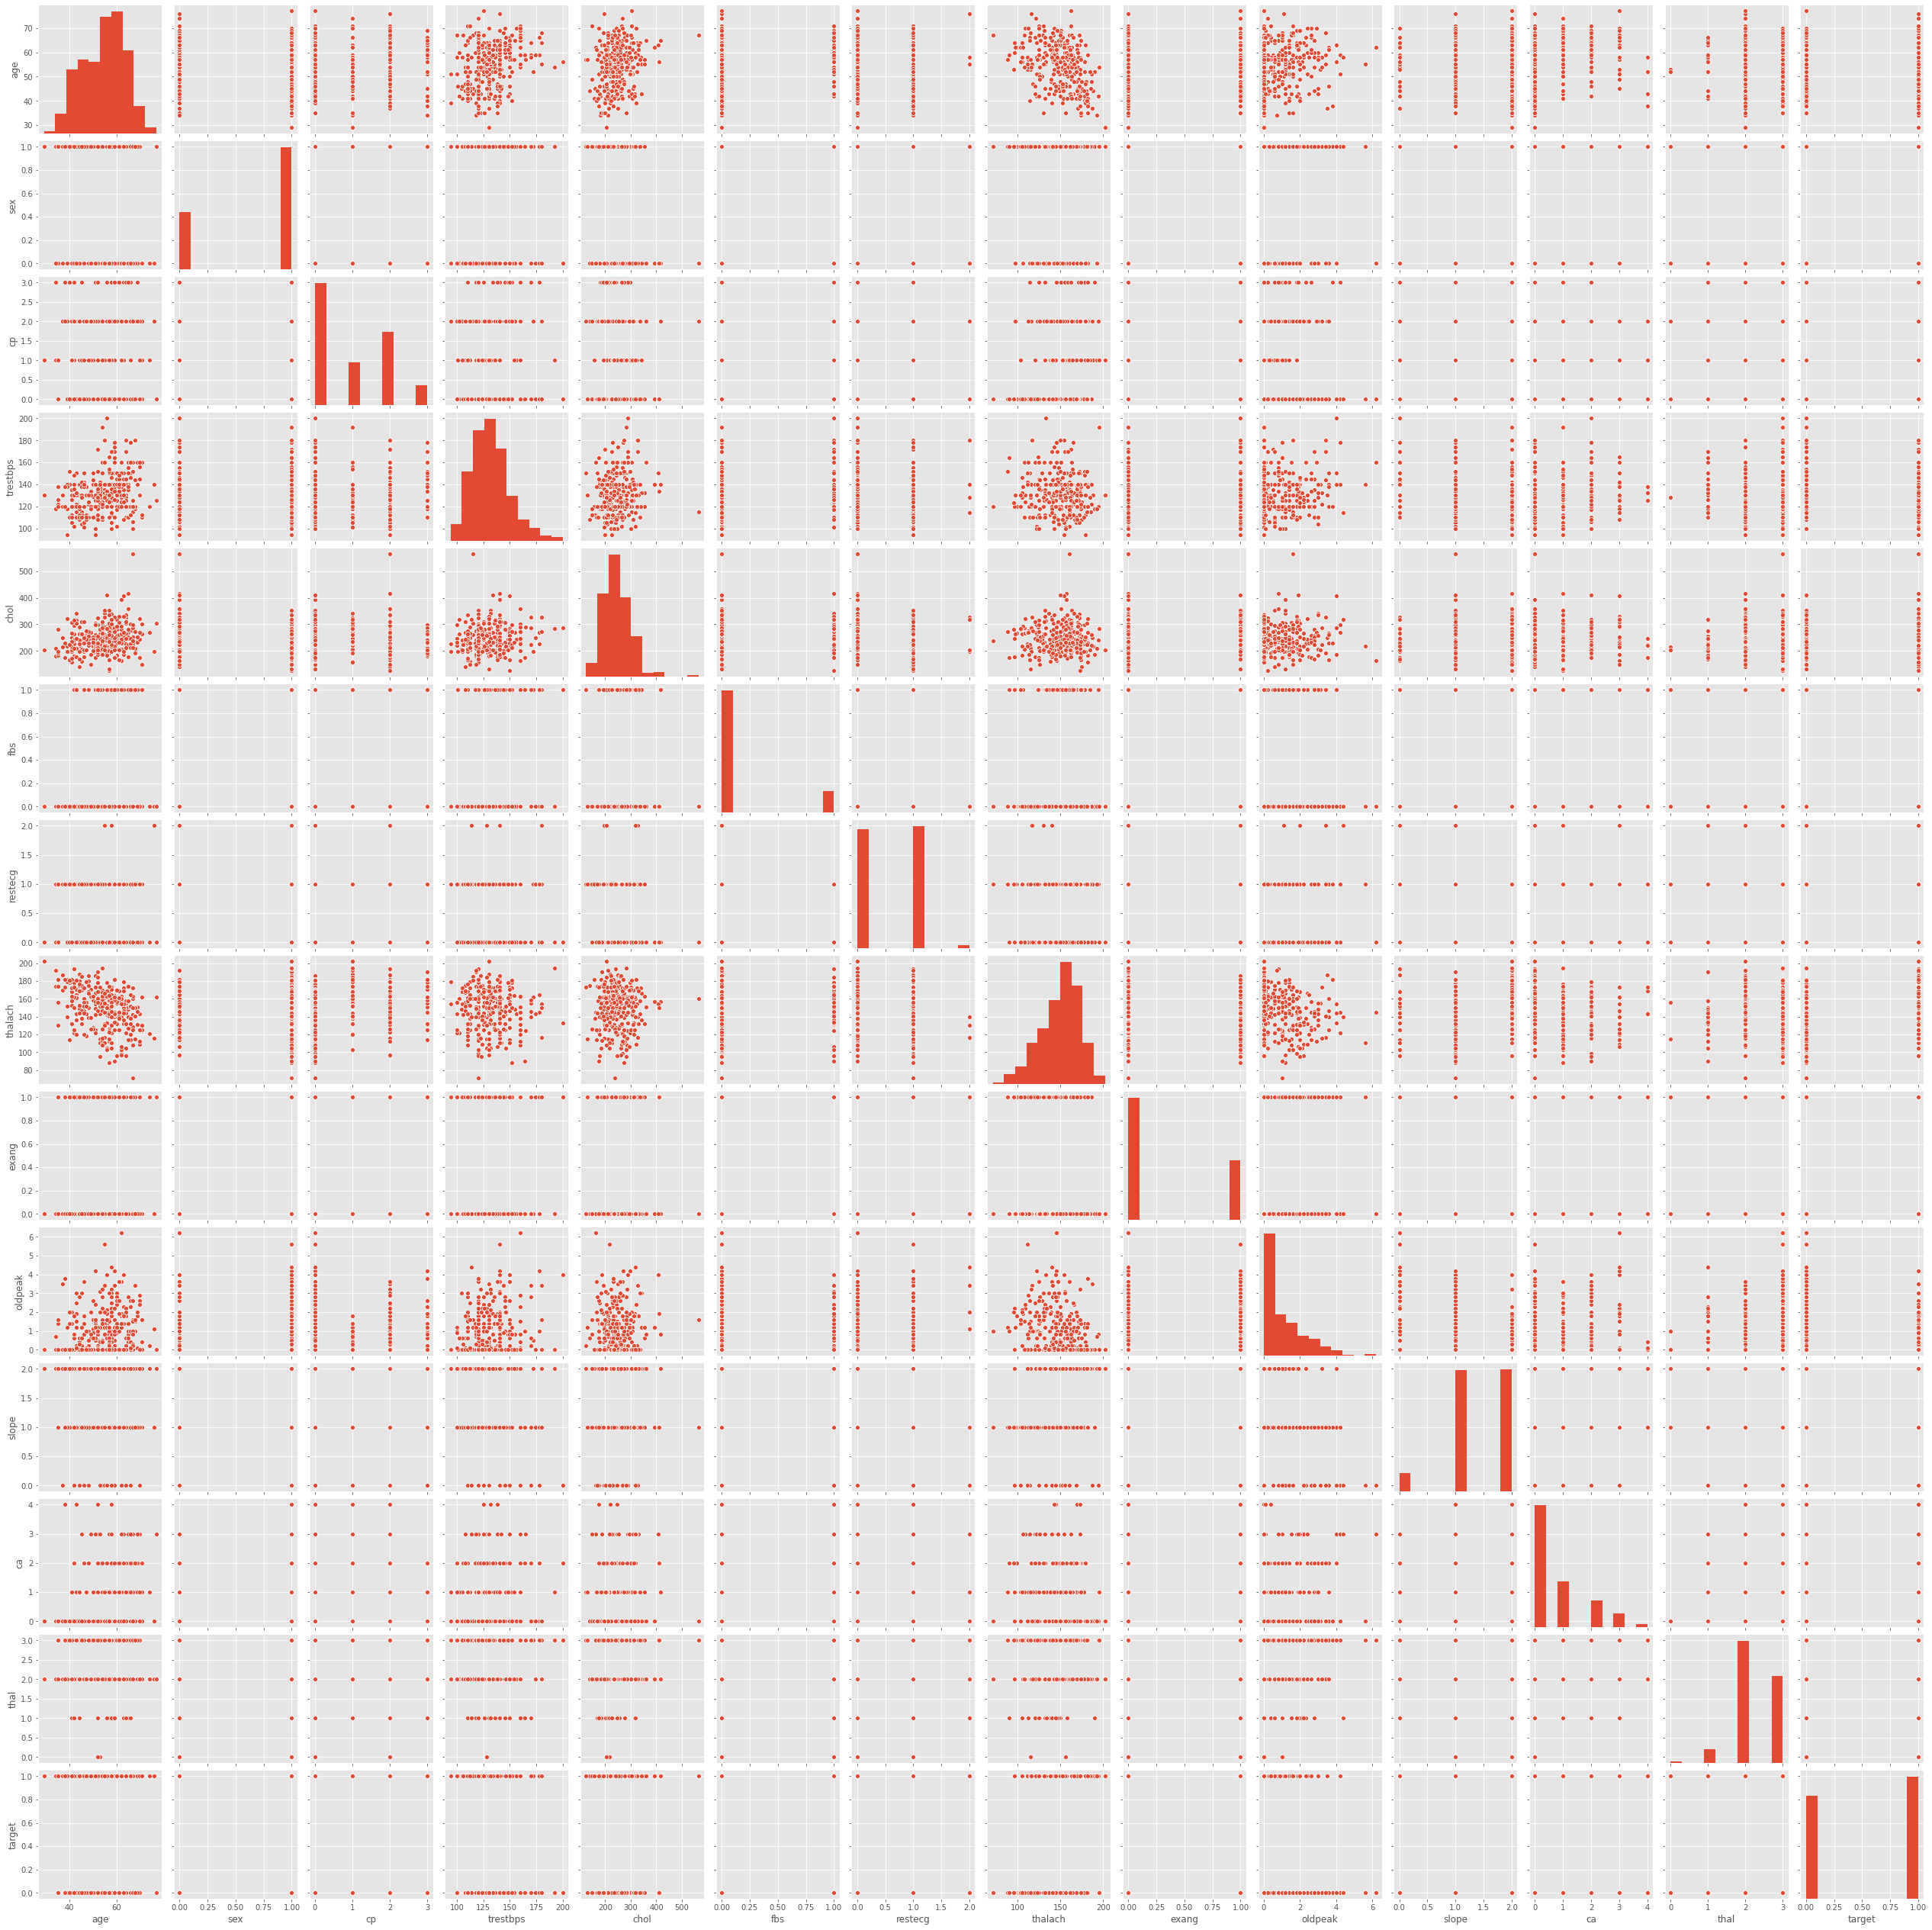

In [90]:
#Pairplot between all given variables
#sns.color_palette('Set2')
sns.pairplot(df)
plt.show()

In [91]:
df.cp.unique()

array([3, 2, 1, 0])

In [92]:
#Model building
#Importing the necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [93]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [94]:
#Finding categorical columns
category=['sex','cp','fbs','restecg','exang','slope','ca','thal']

#getting dummy data for categorical columns
df2 = pd.get_dummies(data=df,columns=category, drop_first = True)
df2.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [95]:
#Define features and outcomes
x = df2.drop(labels='target',axis=1)
y = df2.target

In [96]:
#Splitting the data with test size as 20%
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0,test_size=0.20)

In [97]:
#Standardisation
standardSc = StandardScaler()
standardSc.fit(x_train)
x_train_std=standardSc.transform(x_train)
x_test_std=standardSc.transform(x_test)

In [98]:
#fit the logistic regression model
model = LogisticRegression()
model.fit(x_train_std,y_train)

LogisticRegression()

In [99]:
#Finding slope and intercept
print('Slope:', model.coef_)
print('Intercept:', model.intercept_)

Slope: [[ 0.26714741 -0.36672766 -0.14797235  0.47428211 -0.46110473 -0.81546959
   0.20592894  0.71776101  0.52234885  0.01867103  0.00973873 -0.10782326
  -0.23861142 -0.37180705  0.21564655 -0.88074558 -0.92151337 -0.85256612
   0.13246546  0.22194646  0.47306003 -0.19124792]]
Intercept: [0.07854168]


In [100]:
#R2 on train set
R2_train = model.score(x_train_std,y_train)
print('R2 on train set:', R2_train)

R2 on train set: 0.8879668049792531


In [101]:
#12.Making predictions on the train set
y_train_pred = model.predict(x_train_std)
y_train_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [102]:
#12.Making predictions on the test set
y_test_pred = model.predict(x_test_std)
y_test_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [103]:
#R2 on test set
R2_test = model.score(x_test_std,y_test)
print('R2 on test set:', R2_test)

R2 on test set: 0.8688524590163934


In [104]:
#Confusion matrix with train data
pd.crosstab(y_train,y_train_pred)

col_0,0,1
target,,
0,95,16
1,11,119


In [105]:
#Confusion matrix with test data
pd.crosstab(y_test,y_test_pred)

col_0,0,1
target,,
0,23,4
1,4,30


In [106]:
print('train check',(95+119)/x_train.shape[0])
print('test check',(23+30)/x_test.shape[0])

train check 0.8879668049792531
test check 0.8688524590163934
